In [69]:
from pix2pix_faces.model import Generator
from PIL import Image

import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Instanciar generador y cargar modelo
generator = Generator(3,3)
state = torch.load('pix2pix_faces/checkpoint.pth', map_location='cpu')
generator.load_state_dict(state['generator'])

In [91]:
# Load image:
name = 'pix2pix_faces/not-seen.jpeg'
inp_im = Image.open(name)

In [92]:
transform = transforms = torchvision.transforms.Compose([
             torchvision.transforms.Resize((286,286)),
             torchvision.transforms.ToTensor()])

In [93]:
inp_im = transform(inp_im)

In [94]:
out_im = generator(inp_im.view(1,3,286,286))

In [95]:
inp_im = inp_im.data.numpy().transpose(1,2,0)
out_im = out_im[0].data.numpy().transpose(1,2,0)

diff = np.abs(inp_im - out_im)
max_diff, min_diff = np.amax(diff), np.amin(diff)
diff = (diff - min_diff) / (max_diff - min_diff)

diff = np.abs(diff - .5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


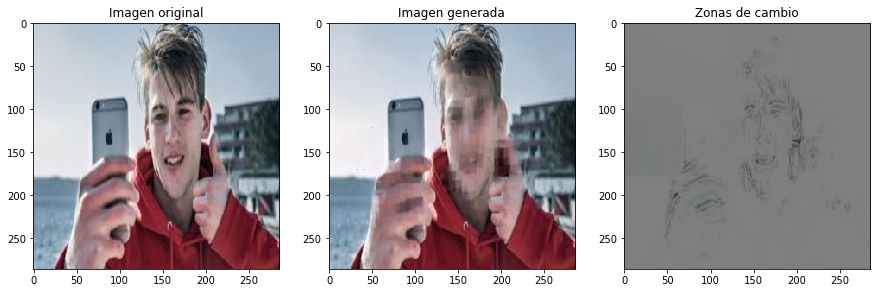

In [96]:
fig, ax = plt.subplots(1,3, figsize=(15,15))

ax[0].set_title('Imagen original')
ax[0].imshow(inp_im)

ax[1].set_title('Imagen generada')
ax[1].imshow(out_im)

ax[2].set_title('Zonas de cambio')
ax[2].imshow(diff)
plt.show()